In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import os
from skimage import io, transform, color
from google.colab import drive
from random import randrange
from PIL import Image
import torch.optim as optim
import matplotlib.patches as patches
import math
import sys
from random import shuffle
import pickle

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("using device " + str(device))

from google.colab import drive
drive.mount('/content/drive')
%cd 
%cd /content/drive/My\ Drive/Colab\ Notebooks/project
!ls
!pwd

using device cuda
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/root
/content/drive/My Drive/Colab Notebooks/project
10test_image.png  faceset.zip
1test_image.png   image-super-resolution
2test_image.png   karras2019stylegan-ffhq-1024x1024.pkl
3test_image.png   lbpcascade_animeface.xml
4test_image.png   log_file
5test_image.png   project.ipynb
6test_image.png   results
7test_image.png   stylegan
8test_image.png   supersample.ipynb
9test_image.png   temp.png
cache		  train-scaled
datasets	  train-scaled.zip
faceset		  transfer_learning.ipynb
/content/drive/My Drive/Colab Notebooks/project


In [3]:
!pip install ISR

     |████████████████████████████████| 92.5MB 114kB/s 
     |████████████████████████████████| 317kB 30.4MB/s 
     |████████████████████████████████| 17.3MB 30.0MB/s 
     |████████████████████████████████| 3.2MB 24.8MB/s 
     |████████████████████████████████| 368kB 50.5MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.17.4
    Uninstalling numpy-1.17.4:
      Successfully uninstalled numpy-1.17.4
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tenso

cache				       rdn-C6-D20-G64-G064-x2
datasets			       results
faceset				       rrdn-C4-D3-G32-G032-T10-x4-GANS
faceset.zip			       stylegan
image-super-resolution		       supersample.ipynb
karras2019stylegan-ffhq-1024x1024.pkl  temp.png
lbpcascade_animeface.xml	       train-scaled
log_file			       train-scaled.zip
project.ipynb			       transfer_learning.ipynb
rdn-C3-D10-G64-G064-x2
/content/drive/My Drive/Colab Notebooks/project


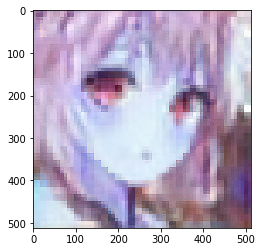

In [8]:
img = Image.open('temp.png')
lr_img = np.array(img)

!ls
!pwd

from ISR.models import RDN

rdn = RDN(arch_params={'C':6, 'D':20, 'G':64, 'G0':64, 'x':2})
rdn.model.load_weights('rdn-C6-D20-G64-G064-x2/ArtefactCancelling/rdn-C6-D20-G64-G064-x2_ArtefactCancelling_epoch219.hdf5')

sr_img = rdn.predict(lr_img)
Image.fromarray(sr_img)

fig, ax = plt.subplots(1)
ax.imshow(sr_img)